In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
netflix_df = pd.read_csv(r'C:\Users\madip\Downloads\archive (4)\netflix.csv')
netflix_df.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


In [11]:
missing_values = netflix_df.isnull().sum()
data_types = netflix_df.dtypes
print("Missing Values:\n", missing_values)
print("\nData Types:\n", data_types)
netflix_df['premiere'] = pd.to_datetime(netflix_df['premiere'], errors='coerce')
missing_premiere = netflix_df['premiere'].isnull().sum()
print("\nMissing values in 'premiere' after conversion:", missing_premiere)

Missing Values:
 title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

Data Types:
 title          object
genre          object
language       object
imdb_score    float64
premiere       object
runtime         int64
year            int64
dtype: object

Missing values in 'premiere' after conversion: 0


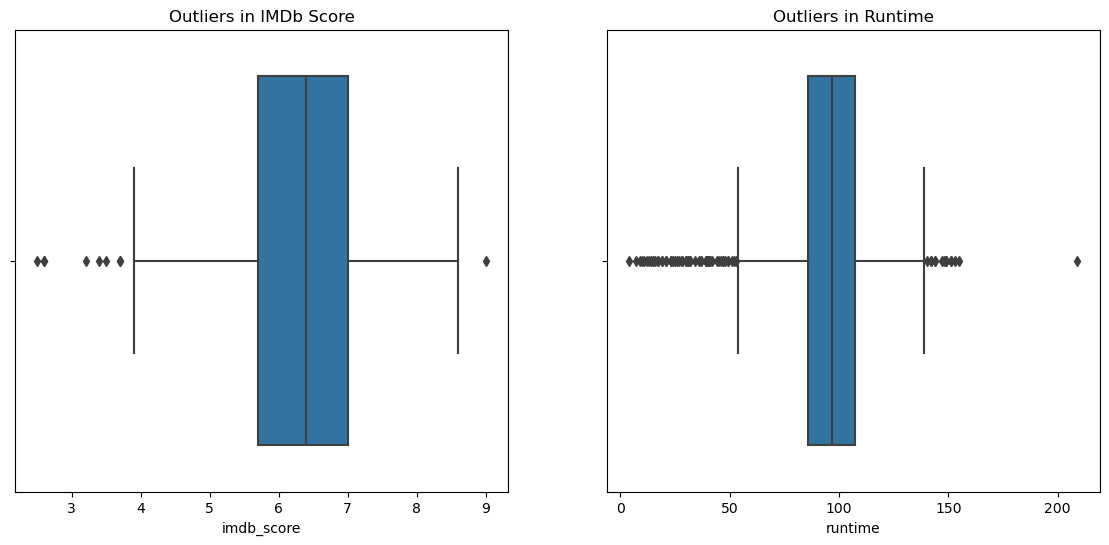

In [12]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=netflix_df, x='imdb_score')
plt.title("Outliers in IMDb Score")

plt.subplot(1, 2, 2)
sns.boxplot(data=netflix_df, x='runtime')
plt.title("Outliers in Runtime")
plt.show()


Descriptive Statistics:
        imdb_score                       premiere     runtime         year
count  583.000000                            583  583.000000   583.000000
mean     6.275129  2019-06-19 17:02:34.373927936   93.490566  2018.934820
min      2.500000            2014-12-13 00:00:00    4.000000  2014.000000
25%      5.700000            2018-06-26 12:00:00   86.000000  2018.000000
50%      6.400000            2019-10-16 00:00:00   97.000000  2019.000000
75%      7.000000            2020-09-19 12:00:00  107.500000  2020.000000
max      9.000000            2021-05-27 00:00:00  209.000000  2021.000000
std      0.976678                            NaN   27.706665     1.474598


C:\Users\madip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


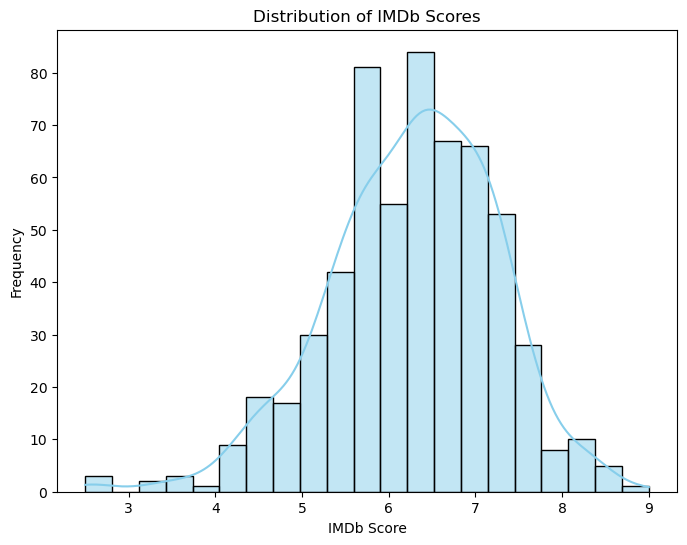

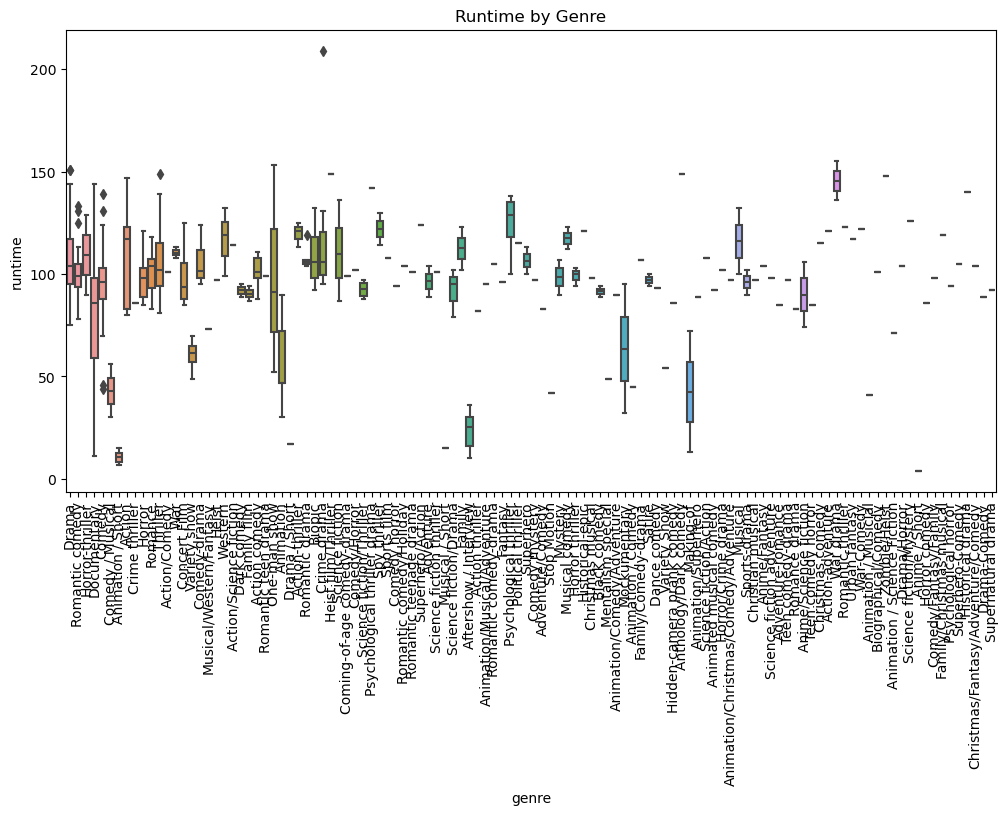

In [13]:
print("\nDescriptive Statistics:\n", netflix_df.describe())
plt.figure(figsize=(8, 6))
sns.histplot(netflix_df['imdb_score'], kde=True, color='skyblue')
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=netflix_df, x='genre', y='runtime')
plt.xticks(rotation=90)
plt.title("Runtime by Genre")
plt.show()

In [14]:

# Question 1: What are the top 5 genres with the highest average IMDb score?
top_genres_imdb = netflix_df.groupby('genre')['imdb_score'].mean().nlargest(5)
print("\nTop 5 Genres by Average IMDb Score:\n", top_genres_imdb)

# Question 2: What is the average runtime of movies per year?
avg_runtime_per_year = netflix_df.groupby('year')['runtime'].mean()
print("\nAverage Runtime per Year:\n", avg_runtime_per_year)

# Question 3: Which language has the highest average IMDb score?
top_language_imdb = netflix_df.groupby('language')['imdb_score'].mean().nlargest(1)
print("\nLanguage with Highest Average IMDb Score:\n", top_language_imdb)

# Question 4: Which genre appears most frequently in the dataset?
top_genre = netflix_df['genre'].mode()[0]
print("\nMost Frequent Genre:", top_genre)

# Question 5: What percentage of movies have an IMDb score above 7.0?
high_imdb_percentage = (netflix_df[netflix_df['imdb_score'] > 7.0].shape[0] / netflix_df.shape[0]) * 100
print("\nPercentage of Movies with IMDb Score above 7.0:", high_imdb_percentage, "%")

# Question 6: How has the average IMDb score changed over the years?
avg_imdb_per_year = netflix_df.groupby('year')['imdb_score'].mean()
print("\nAverage IMDb Score by Year:\n", avg_imdb_per_year)

# Question 7: What are the top 5 longest movies in the dataset?
top_longest_movies = netflix_df.nlargest(5, 'runtime')[['title', 'runtime']]
print("\nTop 5 Longest Movies:\n", top_longest_movies)


Top 5 Genres by Average IMDb Score:
 genre
Animation/Christmas/Comedy/Adventure    8.200000
Musical / Short                         7.700000
Concert Film                            7.633333
Anthology/Dark comedy                   7.600000
Animation / Science Fiction             7.500000
Name: imdb_score, dtype: float64

Average Runtime per Year:
 year
2014     81.000000
2015     90.444444
2016     92.200000
2017     92.863636
2018     95.000000
2019     86.848000
2020     94.725275
2021    101.605634
Name: runtime, dtype: float64

Language with Highest Average IMDb Score:
 language
English/Ukranian/Russian    8.4
Name: imdb_score, dtype: float64

Most Frequent Genre: Documentary

Percentage of Movies with IMDb Score above 7.0: 22.81303602058319 %

Average IMDb Score by Year:
 year
2014    6.400000
2015    6.877778
2016    6.513333
2017    6.422727
2018    6.360606
2019    6.259200
2020    6.205495
2021    6.046479
Name: imdb_score, dtype: float64

Top 5 Longest Movies:
               

C:\Users\madip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\madip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


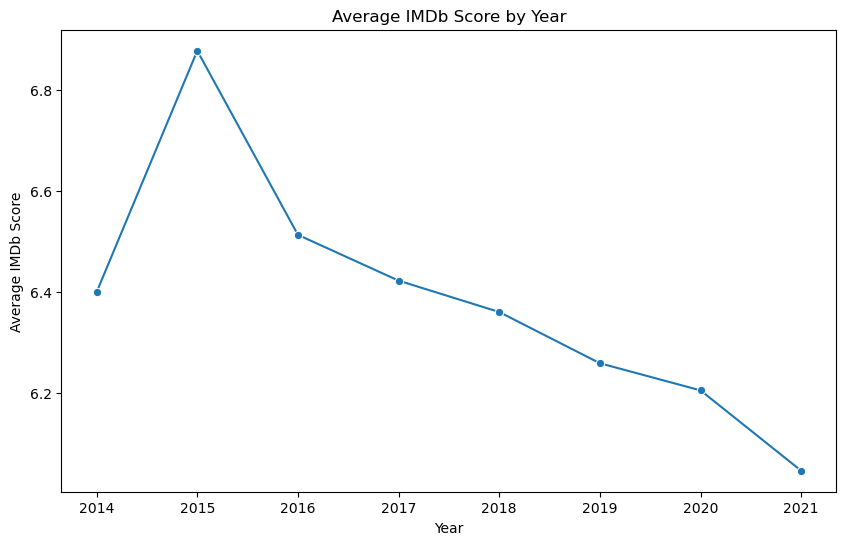

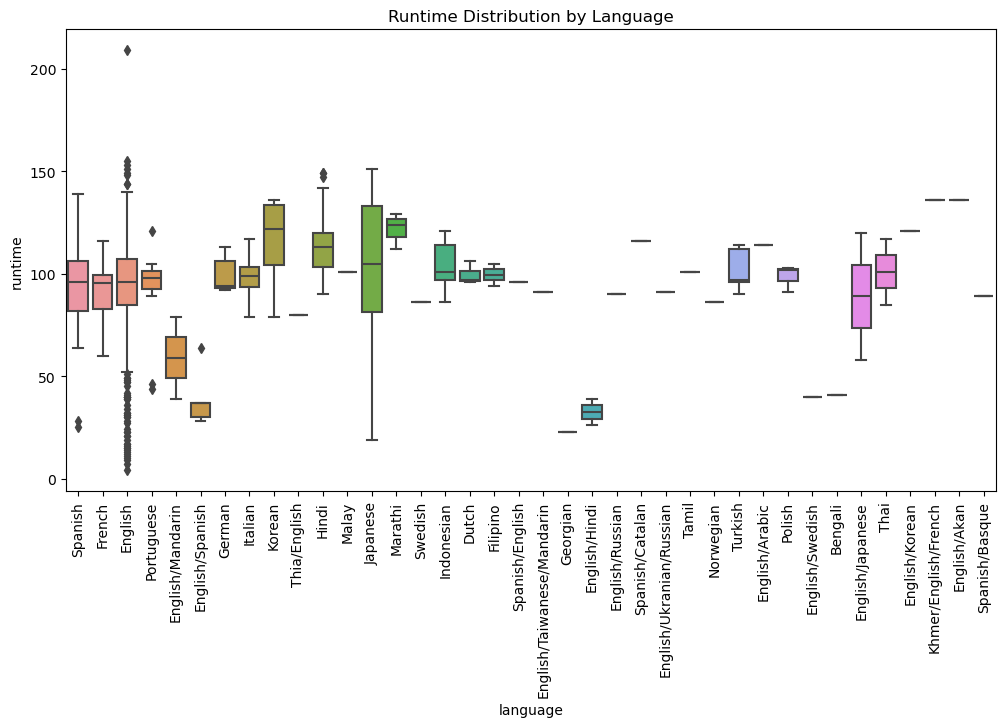

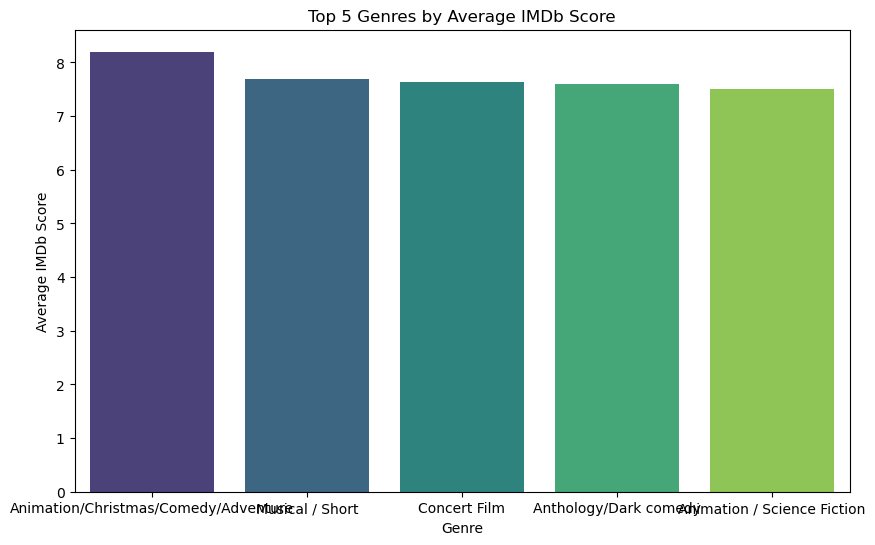

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_imdb_per_year, marker='o')
plt.title("Average IMDb Score by Year")
plt.xlabel("Year")
plt.ylabel("Average IMDb Score")
plt.show()
plt.figure(figsize=(12, 6))
sns.boxplot(data=netflix_df, x='language', y='runtime')
plt.xticks(rotation=90)
plt.title("Runtime Distribution by Language")
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres_imdb.index, y=top_genres_imdb.values, palette='viridis')
plt.title("Top 5 Genres by Average IMDb Score")
plt.xlabel("Genre")
plt.ylabel("Average IMDb Score")
plt.show()